## KMeans Clustering

### Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.cluster import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from mlxtend.plotting import plot_decision_regions

### Data

In [2]:
x = pd.read_csv('data/Mall_Customers.csv')
x.columns = ['customer_id', 'gender', 'age', 'annual_income', 'spending_score']
x = x.drop('customer_id', axis=1)
x['gender'] = x['gender'].map({'Male': 0, 'Female': 1})
display(x.head())


x_train, x_test = train_test_split(x, test_size=0.2, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

,gender,age,annual_income,spending_score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


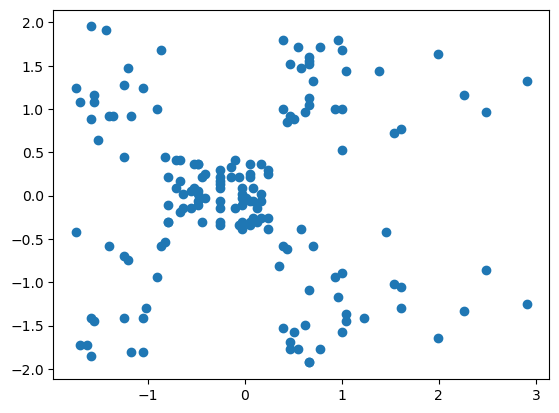

In [3]:
plt.scatter(x_train[:,-2] , x_train[:,-1] )

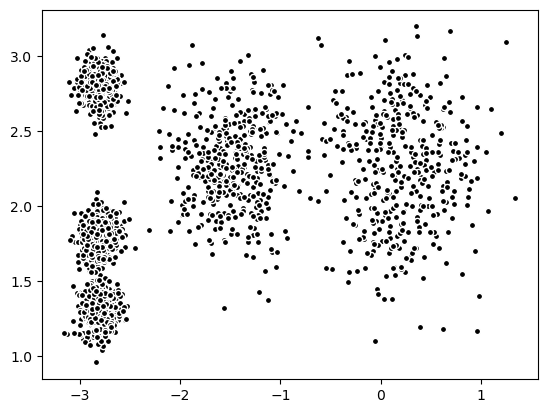

In [4]:
blob_centers = np.array([[ 0.2,  2.3],
                         [-1.5,  2.3],
                         [-2.8,  1.8],
                         [-2.8,  2.8],
                         [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

x2, y2 = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

plt.scatter(x2[:, 0], x2[:, 1], s=20, c='black', edgecolor='white')



### KMeans Model From Scratch

In [5]:
class Kmeans:
    def __init__(self , n_clusters , n_iters=100 , random_state=None ):
        self.n_clusters = n_clusters
        self.n_iters = n_iters
        self.random_state = random_state

    def fit(self , x):
        if self.random_state:
            # print(self.random_state)
            np.random.seed(self.random_state)
            
        centers = x[np.random.choice(len(x) , size = self.n_clusters , replace=False)]

        for i in range(self.n_iters):
            distances = np.linalg.norm(x[:, None, :]-centers, axis=2)
            labels = np.argmin(distances, axis=1)
        
            new_centers = np.array([x[labels == c].mean(axis=0) for c in range(self.n_clusters)])


            centers = new_centers.copy()

        return labels , centers

### Train Model And Visualize

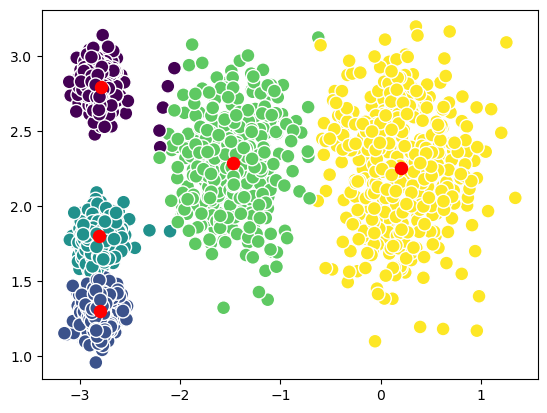

In [6]:
model = Kmeans(5 , random_state=10)
labels , centers = model.fit(x2)
plt.scatter(x2[:,0] , x2[:,1] , c=labels , edgecolors='white' , s=100)
plt.scatter(centers[:,0] , centers[:,1] , c='red' , marker='.' , s=300)


n_clusters = 2, avrage silhouette : 0.4019
n_clusters = 3, avrage silhouette : 0.4661
n_clusters = 4, avrage silhouette : 0.4989
n_clusters = 5, avrage silhouette : 0.5587
n_clusters = 6, avrage silhouette : 0.5580
n_clusters = 7, avrage silhouette : 0.5504
n_clusters = 8, avrage silhouette : 0.4703
n_clusters = 9, avrage silhouette : 0.4732
n_clusters = 10, avrage silhouette : 0.4633


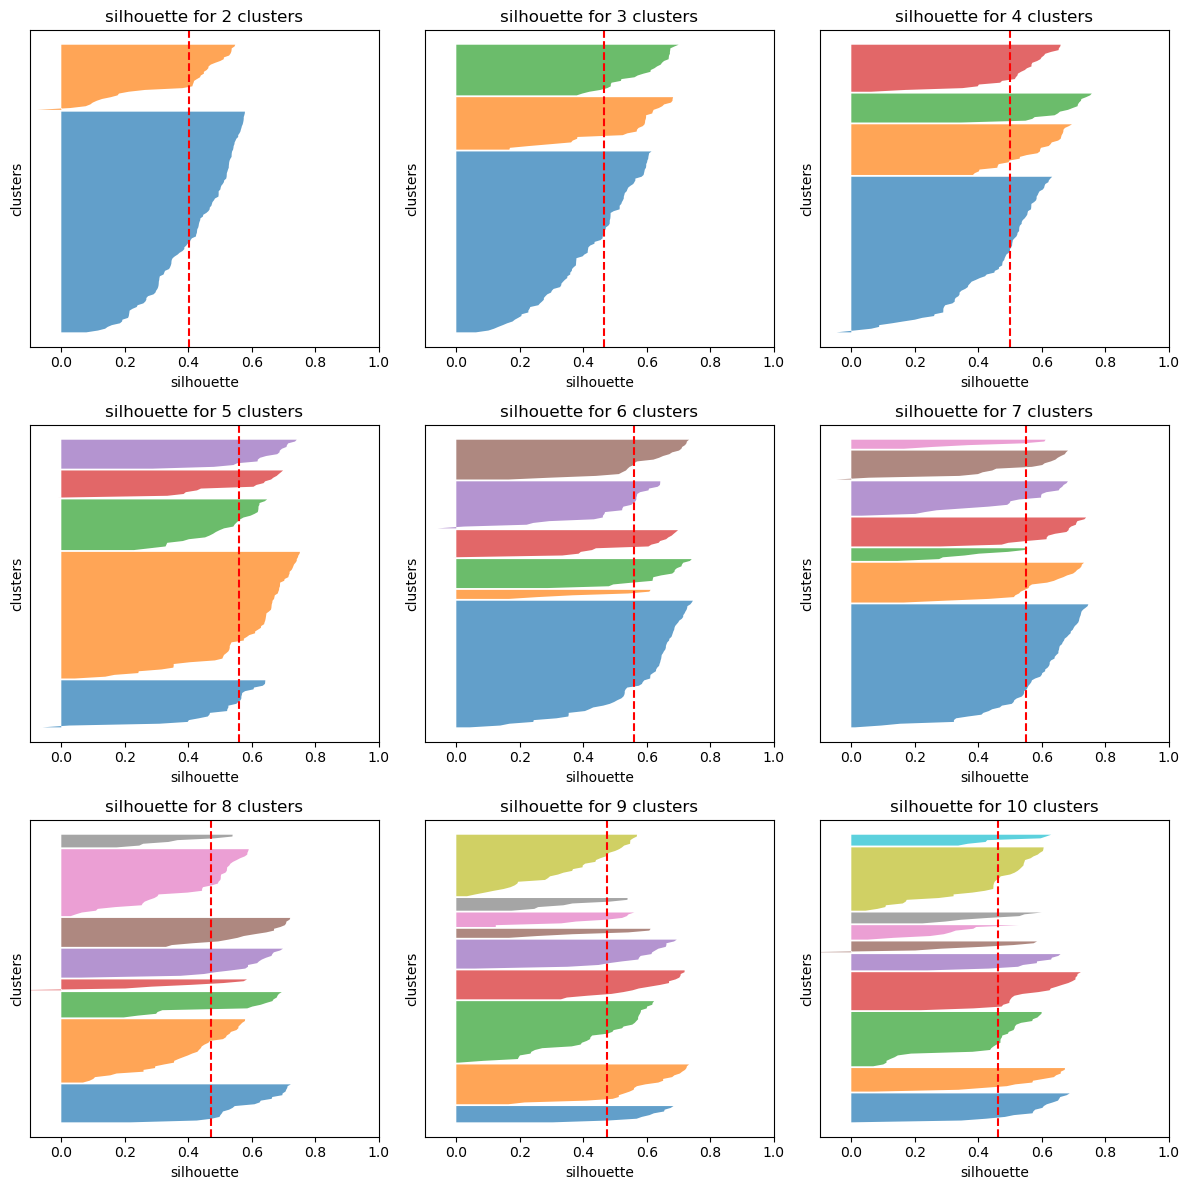

Text(0.5, 1.0, 'Elbow Diagram')

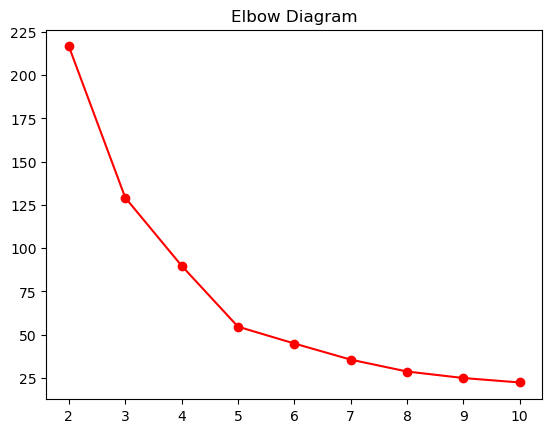

In [7]:
idx = [2, 3]
x = x_train[:, idx].copy()

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes_flat = axes.flatten()
inertia = []
for n in range(2 , 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, 
                    tol=0.0001, random_state=8 , algorithm='elkan')
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_

    silhouette_coefficients = silhouette_samples(x, labels)
    
    
    silhouette_avg = silhouette_score(x, labels)
    print(f"n_clusters = {n}, avrage silhouette : {silhouette_avg:.4f}")

    
    pad = 0
    ax = axes_flat[n - 2]
    
    # delete previous axis
    ax.clear()

   
    ax.set_xlim([-0.1, 1])
    
    
    for ki in range(n):
        
        coeffi = silhouette_coefficients[labels == ki]
        coeffi.sort()
        
        
        ax.fill_betweenx(np.arange(pad, pad + len(coeffi)), 0, coeffi, alpha=0.7)
        
        
        pad += len(coeffi)

    
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    
    ax.set_title(f'silhouette for {n} clusters')
    ax.set_xlabel("silhouette")
    ax.set_ylabel("clusters")
    ax.set_yticks([])

# remove extra axes if is exist
for i in range(n - 1, len(axes_flat)):
    axes_flat[i].axis('off')


plt.tight_layout()
plt.show()


plt.plot(range(2 , 11), inertia, 'r-o');
plt.title("Elbow Diagram")

### KMeans Using Scikitlearn

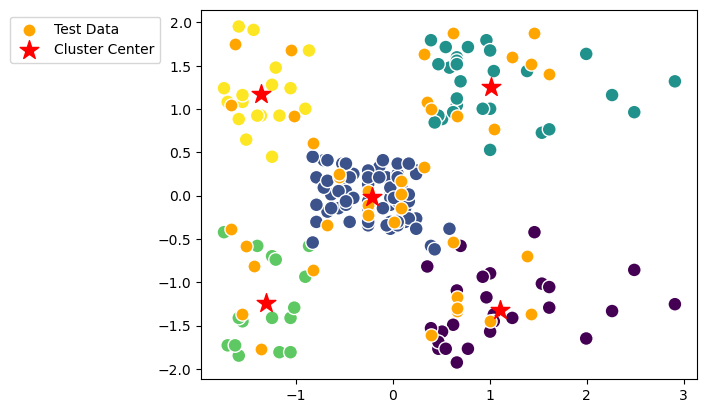

In [8]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, 
                    tol=0.0001, random_state=8 , algorithm='elkan')
kmeans.fit(x)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(x_train[:,-2] , x_train[:,-1] , c=labels , s=100 , edgecolor='white')
plt.scatter(x_test[:,-2] , x_test[:,-1] , c="orange", s=90 , edgecolor='white' , label = 'Test Data')
plt.scatter(centers[:,0] , centers[:,1] , c='red' , marker='*' , s=200 , label = 'Cluster Center')
plt.legend(loc='upper left', bbox_to_anchor=(-0.4, 1))